# Movie Recommendation System


During the last few decades, with the rise of Youtube, Amazon, Netflix and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries).
Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.
This is a movie recommenation system using coorelations.

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

Import Data


In [ ]:
ratings=pd.read_csv('rating.csv')
print(ratings.head(10))


   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40
5       1      112     3.5  2004-09-10 03:09:00
6       1      151     4.0  2004-09-10 03:08:54
7       1      223     4.0  2005-04-02 23:46:13
8       1      253     4.0  2005-04-02 23:35:40
9       1      260     4.0  2005-04-02 23:33:46


In [ ]:
movie_titles=pd.read_csv('movie.csv')
print(movie_titles.head())

   movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)


In [ ]:
#merging ratings and movie titles
data=pd.merge(ratings,movie_titles,on='movieId')
print(data.head())

   userId  movieId  rating            timestamp           title
0       1        2     3.5  2005-04-02 23:53:47  Jumanji (1995)
1       5        2     3.0  1996-12-25 15:26:09  Jumanji (1995)
2      13        2     3.0  1996-11-27 08:19:02  Jumanji (1995)
3      29        2     3.0  1996-06-23 20:36:14  Jumanji (1995)
4      34        2     3.0  1996-10-28 13:29:44  Jumanji (1995)


Visualizing Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')


Creating a ratings dataframe with average rating and number of ratings

In [ ]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Slingshot Hip Hop (2008)                 5.0
Ten Minutes Older: The Trumpet (2002)    5.0
Art of War II: Betrayal, The (2008)      5.0
Kumail Nanjiani: Beta Male (2013)        5.0
Tripping the Rift: The Movie (2008)      5.0
Name: rating, dtype: float64

In [ ]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 12090
Forrest Gump (1994)                 11950
Shawshank Redemption, The (1994)    11372
Silence of the Lambs, The (1991)    11294
Jurassic Park (1993)                10751
Name: rating, dtype: int64

Mean rating of movies not in ascending order

In [ ]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())
print(ratings.head(10))

                                           rating
title                                            
$ (Dollars) (1971)                       3.166667
$5 a Day (2008)                          2.461538
$9.99 (2008)                             3.400000
'71 (2014)                               3.333333
'Hellboy': The Seeds of Creation (2004)  2.750000
'Neath the Arizona Skies (1934)          2.357143
'R Xmas (2001)                           2.571429
'Round Midnight (1986)                   3.620690
'Salem's Lot (2004)                      3.050000
'Til There Was You (1997)                2.813636


Merging no of ratings and mean rating

In [ ]:
ratings['no. of ratings']=pd.DataFrame(data.groupby('title')['rating'].count())
print(ratings.head(10))

                                           rating  no. of ratings
title                                                            
$ (Dollars) (1971)                       3.166667               3
$5 a Day (2008)                          2.461538              13
$9.99 (2008)                             3.400000               5
'71 (2014)                               3.333333               9
'Hellboy': The Seeds of Creation (2004)  2.750000              12
'Neath the Arizona Skies (1934)          2.357143               7
'R Xmas (2001)                           2.571429               7
'Round Midnight (1986)                   3.620690              29
'Salem's Lot (2004)                      3.050000              30
'Til There Was You (1997)                2.813636             110


Histogram for number of ratings

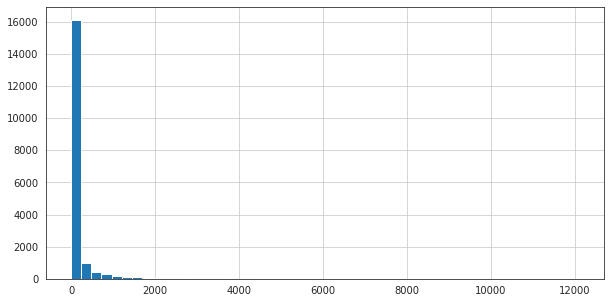

In [ ]:
plt.figure(figsize=(10,5))
ratings['no. of ratings'].hist(bins=50)

Histogram for ratings

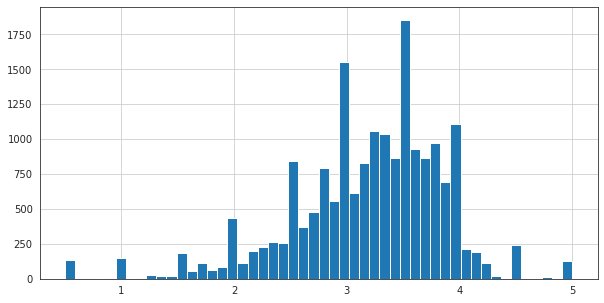

In [ ]:
plt.figure(figsize=(10,5))
ratings['rating'].hist(bins=50)

##Recommending Movies

Creating a matrix of userid and movie title each cell has ratings user gave to that movie

In [ ]:
#movie_matrix=data.groupby(['userId', 'title'])['rating'].min().to_frame()
#movie_matrix.head()

In [ ]:
movie_matrix=data.pivot_table(index='userId',columns='title',values='rating')
movie_matrix.head()

title,$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),+1 (2013),"...All the Marbles (California Dolls, The) (1981)",...And God Spoke (1993),...And Justice for All (1979),.45 (2006),009 Re: Cyborg (2012),"1, 2, 3, Sun (Un, deuz, trois, soleil) (1993)",1-900 (06) (1994),10 (1979),10 Items or Less (2006),10 Questions for the Dalai Lama (2006),10 Rillington Place (1971),10 Things I Hate About You (1999),10 Years (2011),10 to Midnight (1983),"10,000 BC (2008)",10.000 Km (Long Distance) (2014),100 Feet (2008),100 Girls (2000),100 Men and a Girl (One Hundred Men and a Girl) (1937),100 Rifles (1969),"1000 Eyes of Dr. Mabuse, The (Die 1000 Augen des Dr. Mabuse) (1960)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),...,Zombie Island Massacre (1984),"Zombie Lake (Lac des morts vivants, Le) (Zombies Lake) (Lake of the Living Dead, The) (1981)",Zombie Strippers! (2008),Zombie and the Ghost Train (Zombie ja Kummitusjuna) (1991),Zombieland (2009),Zona Zamfirova (2002),Zone 39 (1997),Zone Troopers (1985),"Zone, The (La Zona) (2007)",Zoo (2007),Zoo in Budapest (1933),Zookeeper (2011),Zoolander (2001),Zoom (2006),Zoot Suit (1981),Zorba the Greek (Alexis Zorbas) (1964),Zorn's Lemma (1970),Zorro (1975),"Zorro, the Gay Blade (1981)",Zotz! (1962),Zozo (2005),Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983),Zulu (1964),Zulu Dawn (1979),Zus & Zo (2001),Zuzu Angel (2006),[REC] (2007),[REC] 4: Apocalypse (2014),[REC]² (2009),[REC]³ 3 Génesis (2012),"\\""Great Performances\""\"" Cats (1998)""",a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sorting ratings data frame based on number of ratings

In [ ]:
ratings.sort_values('no. of ratings', ascending=False).head(10)

,rating,no. of ratings
title,,
Pulp Fiction (1994),4.161869,12090
Forrest Gump (1994),4.036192,11950
"Shawshank Redemption, The (1994)",4.449349,11372
"Silence of the Lambs, The (1991)",4.178812,11294
Jurassic Park (1993),3.668589,10751
Star Wars: Episode IV - A New Hope (1977),4.183605,9869
Braveheart (1995),4.039205,9616
Terminator 2: Judgment Day (1991),3.937084,9457
"Matrix, The (1999)",4.172734,9312


Asking user for their favourite movie


In [ ]:
favourite_movie=input('choose a movie that you like')
favourite_movie_rating=movie_matrix[favourite_movie]
favourite_movie_rating.head(20)

choose a movie that you likeJurassic Park (1993)


userId
1     NaN
2     5.0
3     5.0
4     4.0
5     4.0
6     NaN
7     5.0
8     4.0
9     NaN
10    NaN
11    5.0
12    3.0
13    3.0
14    4.0
15    3.0
16    NaN
17    3.0
18    1.5
19    NaN
20    NaN
Name: Jurassic Park (1993), dtype: float64

Using corrwith() method to get correlations between movie matrix and users favourite movie


In [ ]:
similar_to_favourite_movie=movie_matrix.corrwith(favourite_movie_rating)


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Removing NaN values

In [ ]:
corr_favourite_movie=pd.DataFrame(similar_to_favourite_movie,columns=['Correlation'])
corr_favourite_movie.dropna(inplace=True)
corr_favourite_movie.head()


,Correlation
title,
$5 a Day (2008),-0.995871
'71 (2014),-0.231714
'Hellboy': The Seeds of Creation (2004),0.377778
'R Xmas (2001),-0.527046
'Round Midnight (1986),-0.130170


Sorting the dataframe by correlation to get most matching movie

In [ ]:
corr_favourite_movie.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Queen Bee (1955),1.0
"Invisible Woman, The (2013)",1.0
Normal Adolescent Behavior (2007),1.0
Norman (2010),1.0
Woman in Love (Rubbeldiekatz) (2011),1.0
Woman in the Moon (By Rocket to the Moon) (Frau im Mond) (1929),1.0
"Aerial, The (La antena) (2007)",1.0
Campfire Tales (1997),1.0
Not of This Earth (1988),1.0


Filtering out movies that have less than 100 reviews

In [ ]:
#correlation+no of ratings
corr_favourite_movie=corr_favourite_movie.join(ratings['no. of ratings'])
corr_favourite_movie.head()

,Correlation,no. of ratings
title,,
$5 a Day (2008),-0.995871,13
'71 (2014),-0.231714,9
'Hellboy': The Seeds of Creation (2004),0.377778,12
'R Xmas (2001),-0.527046,7
'Round Midnight (1986),-0.130170,29


In [ ]:
#sort
corr_favourite_movie[corr_favourite_movie['no. of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no. of ratings
title,,
Jurassic Park (1993),1.000000,10751
"Lost World: Jurassic Park, The (1997)",0.549319,2697
Airport '77 (1977),0.489561,102
Independence Day (a.k.a. ID4) (1996),0.482918,8451
Jurassic Park III (2001),0.450541,1226
